## Red Wines KNN

In [1]:
#import all libraries

import numpy as np
import pandas as pd

from IPython.display import display, HTML, SVG, Image, IFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# import csv for red
# https://stackoverflow.com/questions/24606330/how-to-read-a-file-with-a-semi-colon-separator-in-pandas

red_wines = pd.read_csv("winequality-red.csv", sep=";")
red_wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# Create Target Column based on quality rating of 5 or lower = bad (0) and 6 or higher = good (1)
red_wines['target'] = np.where(red_wines['quality']<=5,0,1)

Based on a feature importance Diane did on a random forest, Alcohol, volatile acidity, sulphates, density and total sulfur dioxide came in for top 5 features. Looking at boxplot below, total sulfur dioxide has the widest range of of outliers.

In [4]:
# Assign X & y

X = red_wines.drop(["quality", 'target'], axis=1)
y= red_wines.target

In [5]:
# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.3)

In [6]:
# pre-processing (scale data)
# starting with standard scaler and will try minmaxscaler later

X_scaler= StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Train the Model

In [7]:
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train_scaled, y_train)

predictions = classifier.predict(X_test_scaled)
print(predictions)
print(classifier.classes_)

[0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1
 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1
 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0
 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0
 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1
 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0
 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0
 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1
 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0
 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0]
[0 1]


In [8]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.8552278820375335
Testing Data Score: 0.7166666666666667


In [9]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


[[133  80]
 [ 56 211]]
              precision    recall  f1-score   support

           0       0.70      0.62      0.66       213
           1       0.73      0.79      0.76       267

    accuracy                           0.72       480
   macro avg       0.71      0.71      0.71       480
weighted avg       0.72      0.72      0.71       480



## Hyper Parameter Tuning


k: 1, Train/Test Score: 1.000/0.754
k: 3, Train/Test Score: 0.855/0.717
k: 5, Train/Test Score: 0.816/0.725
k: 7, Train/Test Score: 0.804/0.696
k: 9, Train/Test Score: 0.785/0.719
k: 11, Train/Test Score: 0.779/0.713
k: 13, Train/Test Score: 0.777/0.719
k: 15, Train/Test Score: 0.776/0.706
k: 17, Train/Test Score: 0.771/0.721
k: 19, Train/Test Score: 0.770/0.710


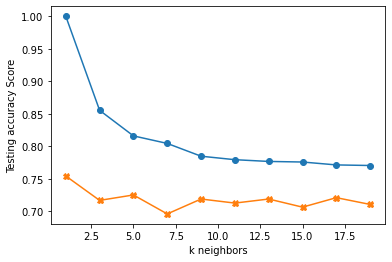

In [10]:
# below code from Linkedin Learning esercise

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="X")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show();

### further tuning

In [11]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,9))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train_scaled, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 1


## Calculating feature importance

In [12]:
# calucalting feature importance
# https://stackoverflow.com/questions/55314345/how-to-find-feature-importance-or-variable-importance-graph-for-knnclassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso



In [13]:
Features = red_wines.drop(['quality', 'target'], axis =1)

Best alpha using built-in LassoCV: 0.009187
Best score using built-in LassoCV: -48.691699
Lasso picked 6 variables and eliminated the other 5 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

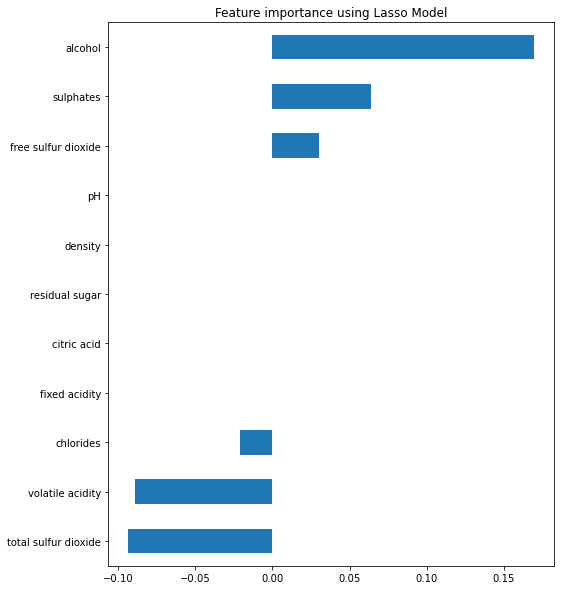

In [14]:
reg = LassoCV()
reg.fit(X_train_scaled, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = Features.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

Based on tuning and feature importance, running one last time with all and with best params.

Best leaf_size: 1
Best p: 2
Best n_neighbors: 1


In [15]:
X2 = red_wines.drop(["quality",'citric acid','fixed acidity','residual sugar', 'pH','target', 'density'], axis=1)
print(X2)
y2=red_wines['target']

      volatile acidity  chlorides  free sulfur dioxide  total sulfur dioxide  \
0                0.700      0.076                 11.0                  34.0   
1                0.880      0.098                 25.0                  67.0   
2                0.760      0.092                 15.0                  54.0   
3                0.280      0.075                 17.0                  60.0   
4                0.700      0.076                 11.0                  34.0   
...                ...        ...                  ...                   ...   
1594             0.600      0.090                 32.0                  44.0   
1595             0.550      0.062                 39.0                  51.0   
1596             0.510      0.076                 29.0                  40.0   
1597             0.645      0.075                 32.0                  44.0   
1598             0.310      0.067                 18.0                  42.0   

      sulphates  alcohol  
0          0

In [16]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=42, test_size=.3)

In [17]:
X_scaler2= StandardScaler().fit(X_train2)
X_train_scaled2 = X_scaler2.transform(X_train2)
X_test_scaled2 = X_scaler2.transform(X_test2)

In [18]:
classifier2 = KNeighborsClassifier(n_neighbors = 1, p = 2, leaf_size=1)
classifier2.fit(X_train_scaled2, y_train2)

predictions2 = classifier2.predict(X_test_scaled2)
print(predictions2)
print(classifier2.classes_)

[0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1
 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0
 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1
 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0
 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0
 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1
 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0
 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1
 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0
 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1]
[0 1]


In [19]:
print(f"Training Data Score: {classifier2.score(X_train_scaled2, y_train2)}")
print(f"Testing Data Score: {classifier2.score(X_test_scaled2, y_test2)}")

Training Data Score: 1.0
Testing Data Score: 0.74375


In [20]:
print(classification_report(y_test2, predictions2))

              precision    recall  f1-score   support

           0       0.72      0.69      0.71       213
           1       0.76      0.78      0.77       267

    accuracy                           0.74       480
   macro avg       0.74      0.74      0.74       480
weighted avg       0.74      0.74      0.74       480



In [21]:
import joblib


In [24]:
filename = 'KNN_Red.sav'
joblib.dump(classifier2, filename)

['KNN_Red.sav']

In [25]:
loaded_model= joblib.load(filename)

result=loaded_model.score(X_test_scaled2, y_test2)

print(result)

0.74375
